In [114]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astro import calc_abs_mag
from coord import *
from sptselection import *
import pandas as pd

## Load references for moving groups

In [115]:
mg_ref = Table.read('Catalogs/moving_groups_ref.csv',format='csv')

In [116]:
source_ref = Table.read('Catalogs/source_ref.csv',format='csv')

## Set infrastructure

In [117]:
ra_all,dec_all,spt_all = [],[],[]
ewha_all,ewha_err_all = [],[]
lhalbol_all,lhalbol_err_all = [],[]
age_all,age_err_all = [],[]
group_num_all,group_name_all = [],[]
source_num_all,source_ref_all = [],[]

## Douglas 2014: Praesepe

In [118]:
douglas2014_p = fits.open('Catalogs/Douglas2014_praesepe.fit')

In [120]:
douglas2014_p[1].columns

ColDefs(
    name = '_RAJ2000'; format = 'F11.7'; unit = 'deg'; start = 2
    name = '_DEJ2000'; format = 'F11.7'; unit = 'deg'; start = 14
    name = 'recno'; format = 'I8'; start = 26
    name = 'Name'; format = 'A22'; start = 35
    name = 'RAJ2000'; format = 'A11'; unit = '"h:m:s"'; start = 58
    name = 'DEJ2000'; format = 'A12'; unit = '"d:m:s"'; start = 70
    name = 'PMem'; format = 'I5'; unit = '%'; start = 83
    name = 'SpType'; format = 'A5'; start = 89
    name = 'rmag'; format = 'F7.3'; unit = 'mag'; start = 95
    name = 'e_rmag'; format = 'F6.3'; unit = 'mag'; start = 103
    name = 'r_rmag'; format = 'A1'; start = 110
    name = 'Kmag'; format = 'F7.3'; unit = 'mag'; start = 112
    name = 'e_Kmag'; format = 'F7.3'; unit = 'mag'; start = 120
    name = 'Dist'; format = 'F4.1'; unit = 'pc'; start = 128
    name = 'r_Dist'; format = 'A1'; start = 133
    name = 'PMass'; format = 'F8.2'; unit = 'Msun'; start = 135
    name = 'Mass'; format = 'F6.2'; unit = 'Msun'; start =

In [6]:
N_douglas2014_p = len(douglas2014_p[1].data['_RAJ2000'])
ra_douglas2014_p = douglas2014_p[1].data['_RAJ2000']
dec_douglas2014_p = douglas2014_p[1].data['_DEJ2000']
spt_douglas2014_p = organize_spt(douglas2014_p[1].data['SpType'])
ewha_douglas2014_p = douglas2014_p[1].data['EW']*-1
ewha_err_douglas2014_p = douglas2014_p[1].data['e_EW']
lhalbol_douglas2014_p = douglas2014_p[1].data['Lum']*1e-5
lhalbol_err_douglas2014_p = douglas2014_p[1].data['e_Lum']*1e-5
kmag_douglas2014_p = douglas2014_p[1].data['Kmag']
kmag_err_douglas2014_p = douglas2014_p[1].data['e_Kmag']
age_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['age'][mg_ref['name']=='PRA'][0]
age_err_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['age_error'][mg_ref['name']=='PRA'][0]
group_num_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['group_num'][mg_ref['name']=='PRA'][0]
group_name_douglas2014_p = np.array(['PRA' for x in range(N_douglas2014_p)])
source_num_douglas2014_p = np.ones(N_douglas2014_p)*source_ref['source_num'][source_ref['source_ref']=='Douglas 2014'][0]
source_ref_douglas2014_p = np.array(['Douglas 2014' for x in range(N_douglas2014_p)])

In [7]:
for column in [ewha_douglas2014_p,ewha_err_douglas2014_p,lhalbol_douglas2014_p,lhalbol_err_douglas2014_p]:
    mask = column == 0.0
    column[mask] = np.nan
    mask = column == -0.0
    column[mask] = np.nan

In [8]:
douglas2014_p.close()

In [9]:
ra_all.append(ra_douglas2014_p) 
dec_all.append(dec_douglas2014_p)
spt_all.append(spt_douglas2014_p)
ewha_all.append(ewha_douglas2014_p)
ewha_err_all.append(ewha_err_douglas2014_p)
lhalbol_all.append(lhalbol_douglas2014_p)
lhalbol_err_all.append(lhalbol_err_douglas2014_p)
age_all.append(age_douglas2014_p)
age_err_all.append(age_err_douglas2014_p)
group_num_all.append(group_num_douglas2014_p)
group_name_all.append(group_name_douglas2014_p)
source_num_all.append(source_num_douglas2014_p)
source_ref_all.append(source_ref_douglas2014_p)

## Douglas 2014: Hyades

In [10]:
douglas2014_h = fits.open('Catalogs/Douglas2014_hyades.fit')

In [11]:
N_douglas2014_h = len(douglas2014_h[1].data['_RAJ2000'])
ra_douglas2014_h = douglas2014_h[1].data['_RAJ2000']
dec_douglas2014_h = douglas2014_h[1].data['_DEJ2000']
spt_douglas2014_h = organize_spt(douglas2014_h[1].data['SpTypeH'])
ewha_douglas2014_h = douglas2014_h[1].data['EW']*-1
ewha_err_douglas2014_h = douglas2014_h[1].data['e_EW']
lhalbol_douglas2014_h = douglas2014_h[1].data['Lum']*1e-5
lhalbol_err_douglas2014_h = douglas2014_h[1].data['e_Lum']*1e-5
kmag_douglas2014_h = douglas2014_h[1].data['Kmag']
kmag_err_douglas2014_h = douglas2014_h[1].data['e_Kmag']
age_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['age'][mg_ref['name']=='HYA'][0]
age_err_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['age_error'][mg_ref['name']=='HYA'][0]
group_num_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['group_num'][mg_ref['name']=='HYA'][0]
group_name_douglas2014_h = np.array(['HYA' for x in range(N_douglas2014_h)])
source_num_douglas2014_h = np.ones(N_douglas2014_h)*source_ref['source_num'][source_ref['source_ref']=='Douglas 2014'][0]
source_ref_douglas2014_h = np.array(['Douglas 2014' for x in range(N_douglas2014_h)])

In [12]:
for column in [ewha_douglas2014_h,ewha_err_douglas2014_h,lhalbol_douglas2014_h,lhalbol_err_douglas2014_h]:
    mask = column == 0.0
    column[mask] = np.nan
    mask = column == -0.0
    column[mask] = np.nan

In [13]:
douglas2014_h.close()

In [14]:
ra_all.append(ra_douglas2014_h) 
dec_all.append(dec_douglas2014_h)
spt_all.append(spt_douglas2014_h)
ewha_all.append(ewha_douglas2014_h)
ewha_err_all.append(ewha_err_douglas2014_h)
lhalbol_all.append(lhalbol_douglas2014_h)
lhalbol_err_all.append(lhalbol_err_douglas2014_h)
age_all.append(age_douglas2014_h)
age_err_all.append(age_err_douglas2014_h)
group_num_all.append(group_num_douglas2014_h)
group_name_all.append(group_name_douglas2014_h)
source_num_all.append(source_num_douglas2014_h)
source_ref_all.append(source_ref_douglas2014_h)

## Fang 2018: Pleiades, M34, Praesepe and Hyades

In [121]:
file1 = pd.read_csv('Catalogs/Fang2018Table_F1_online.dat', sep="\s+")
file2 = pd.read_csv('Catalogs/Fang2018Table_F2_online.dat', sep="\s+")
file3 = pd.read_csv('Catalogs/Fang2018Table_F3_online.dat', sep="\s+")
file4 = pd.read_csv('Catalogs/Fang2018Table_F4_online.dat', sep="\s+")

In [122]:
N = len(file1['EWHa']) + len(file2['EWHa']) + len(file3['EWHa']) + len(file4['EWHa'])

In [17]:
teff1 = file1['#Teff']
ewha1 = file1['EWHa']
multi1 = file1['multi'] == 0
N1 = len(file1['EWHa'])
group1 = np.array(['PLE' for x in range(N1)])
group_num1 = np.ones(N1)*mg_ref['group_num'][mg_ref['name']=='PLE'][0]
age1 = np.ones(N1)*mg_ref['age'][mg_ref['name']=='PLE'][0]
age_err1 = np.ones(N1)*mg_ref['age_error'][mg_ref['name']=='PLE'][0]
ra1 = file1['RAJ2000']
dec1 = file1['DEJ2000']

teff2 = file2['Teff']
ewha2 = file2['EWHa']
N2 = len(file2['EWHa'])
multi2 = np.array([True for x in range(N2)])
group2 = np.array(['M34' for x in range(N2)])
group_num2 = np.ones(N2)*mg_ref['group_num'][mg_ref['name']=='M34'][0]
age2 = np.ones(N2)*mg_ref['age'][mg_ref['name']=='M34'][0]
age_err2 = np.ones(N2)*mg_ref['age_error'][mg_ref['name']=='M34'][0]
ra2 = file2['RAJ2000']
dec2 = file2['DEJ2000']

teff3 = file3['Teff']
ewha3 = file3['EWHa']
N3 = len(file3['EWHa'])
multi3 = np.array([True for x in range(N3)])
group3 = np.array(['PRA' for x in range(N3)])
group_num3 = np.ones(N3)*mg_ref['group_num'][mg_ref['name']=='PRA'][0]
age3 = np.ones(N3)*mg_ref['age'][mg_ref['name']=='PRA'][0]
age_err3 = np.ones(N3)*mg_ref['age_error'][mg_ref['name']=='PRA'][0]
ra3 = file3['RAJ2000']
dec3 = file3['DEJ2000']

teff4 = file4['Teff']
ewha4 = file4['EWHa']
multi4 = file4['multi'] == 0
N4 = len(file4['EWHa'])
group4 = np.array(['HYA' for x in range(N4)])
group_num4 = np.ones(N4)*mg_ref['group_num'][mg_ref['name']=='HYA'][0]
age4 = np.ones(N4)*mg_ref['age'][mg_ref['name']=='HYA'][0]
age_err4 = np.ones(N4)*mg_ref['age_error'][mg_ref['name']=='HYA'][0]
ra4 = file4['RAJ2000']
dec4 = file4['DEJ2000']

In [18]:
ra_fang2018 = np.concatenate((ra1[multi1],ra2[multi2],ra3[multi3],ra4[multi4]))
dec_fang2018 = np.concatenate((dec1[multi1],dec2[multi2],dec3[multi3],dec4[multi4]))
N_fang2018 = len(dec_fang2018)
spt_fang2018 = np.nan*np.ones(N_fang2018)
ewha_fang2018 = np.concatenate((ewha1[multi1],ewha2[multi2],ewha3[multi3],ewha4[multi4]))
ewha_err_fang2018 = 0.5*np.ones(N_fang2018)
lhalbol_fang2018 = np.nan*np.ones(N_fang2018)
lhalbol_err_fang2018 = np.nan*np.ones(N_fang2018)
kmag_fang2018 = np.nan*np.ones(N_fang2018)
kmag_err_fang2018 = np.nan*np.ones(N_fang2018)
age_fang2018 = np.concatenate((age1[multi1],age2[multi2],age3[multi3],age4[multi4]))
age_err_fang2018 = np.concatenate((age_err1[multi1],age_err2[multi2],age_err3[multi3],age_err4[multi4]))
group_num_fang2018 = np.concatenate((group_num1[multi1],group_num2[multi2],group_num3[multi3],group_num4[multi4]))
group_name_fang2018 = np.concatenate((group1[multi1],group2[multi2],group3[multi3],group4[multi4]))
source_num_fang2018 = np.ones(N_fang2018)*source_ref['source_num'][source_ref['source_ref']=='Fang 2018'][0]
source_ref_fang2018 = np.array(['Fang 2018' for x in range(N_fang2018)])

In [19]:
for column in [ewha_fang2018]:
    mask = column == -9999.0
    column[mask] = np.nan

In [20]:
ra_all.append(ra_fang2018) 
dec_all.append(dec_fang2018)
spt_all.append(spt_fang2018)
ewha_all.append(ewha_fang2018)
ewha_err_all.append(ewha_err_fang2018)
lhalbol_all.append(lhalbol_fang2018)
lhalbol_err_all.append(lhalbol_err_fang2018)
age_all.append(age_fang2018)
age_err_all.append(age_err_fang2018)
group_num_all.append(group_num_fang2018)
group_name_all.append(group_name_fang2018)
source_num_all.append(source_num_fang2018)
source_ref_all.append(source_ref_fang2018)

## Malo 2014: BPMG, TWA, THA, COL, CAR, ARG, ABDMG

In [124]:
malo2014 = fits.open('Catalogs/Malo2014.fit')

In [125]:
malo2014[1].columns

ColDefs(
    name = '_RAJ2000'; format = 'D'; unit = 'deg'; disp = 'F11.7'
    name = '_DEJ2000'; format = 'D'; unit = 'deg'; disp = 'F11.7'
    name = 'NYA'; format = '13A'; disp = 'A13'
    name = '_2MASS'; format = '17A'; disp = 'A17'
    name = 'Icmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'e_Icmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'r_Icmag'; format = '2A'; disp = 'A2'
    name = 'Jmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'e_Jmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'pmRA'; format = 'E'; unit = 'mas/yr'; disp = 'F6.1'
    name = 'e_pmRA'; format = 'E'; unit = 'mas/yr'; disp = 'F4.1'
    name = 'pmDE'; format = 'E'; unit = 'mas/yr'; disp = 'F6.1'
    name = 'e_pmDE'; format = 'E'; unit = 'mas/yr'; disp = 'F4.1'
    name = 'r_pmDE'; format = '2A'; disp = 'A2'
    name = 'SpT'; format = '10A'; disp = 'A10'
    name = 'logfX'; format = 'E'; unit = '[mW/m2]'; disp = 'F6.2'
    name = 'Ha'; format = 'E'; unit = '0.1

In [22]:
bpic3 = malo2014[1].data['bPicP3']
twhya3 = malo2014[1].data['TWAP3']
tuchor3 = malo2014[1].data['THAP3']
columb3 = malo2014[1].data['ColP3']
car3 = malo2014[1].data['CarP3']
argus3 = malo2014[1].data['ArgP3']
abdor3 = malo2014[1].data['ABDorP3']
field3 = malo2014[1].data['FldP3']

bpic1 = malo2014[1].data['bPicP1']
twhya1 = malo2014[1].data['TWAP1']
tuchor1 = malo2014[1].data['THAP1']
columb1 = malo2014[1].data['ColP1']
car1 = malo2014[1].data['CarP1']
argus1 = malo2014[1].data['ArgP1']
abdor1 = malo2014[1].data['ABDorP1']
field1 = malo2014[1].data['FldP1']

bpic = malo2014[1].data['bPicP']
twhya = malo2014[1].data['TWAP']
tuchor = malo2014[1].data['THAP']
columb = malo2014[1].data['ColP']
car = malo2014[1].data['CarP']
argus = malo2014[1].data['ArgP']
abdor = malo2014[1].data['ABDorP']
field = malo2014[1].data['FldP']

In [23]:
groups =np.array(['BPMG','TWA','THA','COL','CAR','ARG','ABDMG','FIELD'])
groups_num =np.array([mg_ref['group_num'][mg_ref['name']=='BPMG'][0],
                      mg_ref['group_num'][mg_ref['name']=='TWA'][0],
                      mg_ref['group_num'][mg_ref['name']=='THA'][0],
                      mg_ref['group_num'][mg_ref['name']=='COL'][0],
                      mg_ref['group_num'][mg_ref['name']=='CAR'][0],
                      mg_ref['group_num'][mg_ref['name']=='ARG'][0],
                      mg_ref['group_num'][mg_ref['name']=='ABDMG'][0],
                      np.nan])
age = np.array([mg_ref['age'][mg_ref['name']=='BPMG'][0],
                mg_ref['age'][mg_ref['name']=='TWA'][0],
                mg_ref['age'][mg_ref['name']=='THA'][0],
                mg_ref['age'][mg_ref['name']=='COL'][0],
                mg_ref['age'][mg_ref['name']=='CAR'][0],
                mg_ref['age'][mg_ref['name']=='ARG'][0],
                mg_ref['age'][mg_ref['name']=='ABDMG'][0],
                np.nan])
age_err = np.array([mg_ref['age_error'][mg_ref['name']=='BPMG'][0],
                    mg_ref['age_error'][mg_ref['name']=='TWA'][0],
                    mg_ref['age_error'][mg_ref['name']=='THA'][0],
                    mg_ref['age_error'][mg_ref['name']=='COL'][0],
                    mg_ref['age_error'][mg_ref['name']=='CAR'][0],
                    mg_ref['age_error'][mg_ref['name']=='ARG'][0],
                    mg_ref['age_error'][mg_ref['name']=='ABDMG'][0], 
                    np.nan])

#groups =np.array(['CARN','HYA','CBER','TAU','BPMG','TWA','THA','COL','CAR','ARG','ABDMG','FIELD'])
#age_list = np.array([200,750,562,1.5,24,10,45,42,45,40,149, np.nan ])
#age_err_list = np.array([100,100,98,0.5,3,3,4,6,11,10,51, np.nan])

In [24]:
age_stars = []
age_err_stars = []
group_stars = []
group_num_stars = []
max_prob_stars = []
for i in range(len(bpic3)):
    probs = np.array([bpic3[i],twhya3[i],tuchor3[i],columb3[i],car3[i],argus3[i],abdor3[i],field3[i]])
    max_prob = max(probs)
    if(str(max_prob)=='nan'):
        probs = np.array([bpic1[i],twhya1[i],tuchor1[i],columb1[i],car1[i],argus1[i],abdor1[i],field1[i]])
        max_prob = max(probs)
        if(str(max_prob)=='nan'):
            probs = np.array([bpic[i],twhya[i],tuchor[i],columb[i],car[i],argus[i],abdor[i],field[i]])
            max_prob = max(probs)
    mask = probs == max_prob
    age_stars.append(age[mask][0])
    age_err_stars.append(age_err[mask][0])
    group_stars.append(groups[mask][0])
    group_num_stars.append(groups_num[mask][0])
    max_prob_stars.append(max_prob)

In [25]:
spt_malo2014 = organize_spt(malo2014[1].data['SPT'])

In [26]:
mask_singles_malo2014 = np.array([True if str(x)!='nan' else False for x in spt_malo2014])
ra_malo2014 = malo2014[1].data['_RAJ2000'][mask_singles_malo2014]
dec_malo2014 = malo2014[1].data['_DEJ2000'][mask_singles_malo2014]
N_malo2014 = len(dec_malo2014)
spt_malo2014 = spt_malo2014[mask_singles_malo2014]
ewha_malo2014 = malo2014[1].data['Ha'][mask_singles_malo2014]
ewha_err_malo2014 = 0.5*np.ones(N_malo2014) #From Riaz 2006
lhalbol_malo2014 = np.nan*np.ones(N_malo2014)
lhalbol_err_malo2014 = np.nan*np.ones(N_malo2014)
kmag_malo2014 = np.nan*np.ones(N_malo2014)
kmag_err_malo2014 = np.nan*np.ones(N_malo2014)
age_malo2014 = np.array(age_stars)[mask_singles_malo2014]
age_err_malo2014 = np.array(age_err_stars)[mask_singles_malo2014]
group_num_malo2014 = np.array(group_num_stars)[mask_singles_malo2014]
group_name_malo2014 = np.array(group_stars)[mask_singles_malo2014]
source_num_malo2014 = np.ones(N_malo2014)*source_ref['source_num'][source_ref['source_ref']=='Malo 2014'][0]
source_ref_malo2014 = np.array(['Malo 2014' for x in range(N_malo2014)])

In [27]:
malo2014.close()

In [28]:
ra_all.append(ra_malo2014) 
dec_all.append(dec_malo2014)
spt_all.append(spt_malo2014)
ewha_all.append(ewha_malo2014)
ewha_err_all.append(ewha_err_malo2014)
lhalbol_all.append(lhalbol_malo2014)
lhalbol_err_all.append(lhalbol_err_malo2014)
age_all.append(age_malo2014)
age_err_all.append(age_err_malo2014)
group_num_all.append(group_num_malo2014)
group_name_all.append(group_name_malo2014)
source_num_all.append(source_num_malo2014)
source_ref_all.append(source_ref_malo2014)

## Shkolnik 2017: BPMG

In [29]:
shkolnik2017 = fits.open('Catalogs/Shkolnik2017.fit')

In [30]:
spt_shkolnik2017 = organize_spt(shkolnik2017[1].data['SpType'])

In [31]:
list_mem = shkolnik2017[1].data['BPMG']
member = np.array([True if x=='Y' else False for x in list_mem])

member_single_shkolnik2017 = member * np.array([True if str(x)!='nan' else False for x in spt_shkolnik2017])

In [32]:
ra_shkolnik2017 = shkolnik2017[1].data['_RAJ2000'][member_single_shkolnik2017]
dec_shkolnik2017 = shkolnik2017[1].data['_DEJ2000'][member_single_shkolnik2017]
N_shkolnik2017 = len(dec_shkolnik2017)
spt_shkolnik2017 = spt_shkolnik2017[member_single_shkolnik2017]
ewha_shkolnik2017 = shkolnik2017[1].data['EW_Ha_'][member_single_shkolnik2017]*(-1)
ewha_err_shkolnik2017 = np.ones(N_shkolnik2017)*0.1 #says in the paper
lhalbol_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
lhalbol_err_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
kmag_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
kmag_err_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
age_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['age'][mg_ref['name']=='BPMG'][0]
age_err_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['age_error'][mg_ref['name']=='BPMG'][0]

group_num_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['group_num'][mg_ref['name']=='BPMG'][0]
group_name_shkolnik2017 = np.array(['BPMG' for i in range(N_shkolnik2017)])
source_num_shkolnik2017 = np.ones(N_shkolnik2017)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2017'][0]
source_ref_shkolnik2017 = np.array(['Shkolnik 2017' for x in range(N_shkolnik2017)])

In [33]:
shkolnik2017.close()

In [34]:
ra_all.append(ra_shkolnik2017) 
dec_all.append(dec_shkolnik2017)
spt_all.append(spt_shkolnik2017)
ewha_all.append(ewha_shkolnik2017)
ewha_err_all.append(ewha_err_shkolnik2017)
lhalbol_all.append(lhalbol_shkolnik2017)
lhalbol_err_all.append(lhalbol_err_shkolnik2017)
age_all.append(age_shkolnik2017)
age_err_all.append(age_err_shkolnik2017)
group_num_all.append(group_num_shkolnik2017)
group_name_all.append(group_name_shkolnik2017)
source_num_all.append(source_num_shkolnik2017)
source_ref_all.append(source_ref_shkolnik2017)

## Kraus 2014: Tucana-Horologium

In [35]:
kraus2014 = fits.open('Catalogs/Kraus2014.fit')

In [36]:
ra_kraus2014 = kraus2014[1].data['_RAJ2000']
dec_kraus2014 = kraus2014[1].data['_DEJ2000']
N_kraus2014 = len(dec_kraus2014)
spt_kraus2014 = organize_spt(kraus2014[1].data['SpT'])
ewha_kraus2014 = kraus2014[1].data['EWHa']*(-1)
ewha_err_kraus2014 = np.ones(N_kraus2014)*0.1 #says in the paper
lhalbol_kraus2014 = np.ones(N_kraus2014)*np.nan
lhalbol_err_kraus2014 = np.ones(N_kraus2014)*np.nan
kmag_kraus2014 = np.ones(N_kraus2014)*np.nan
kmag_err_kraus2014 = np.ones(N_kraus2014)*np.nan
age_kraus2014 = np.ones(N_kraus2014)*mg_ref['age'][mg_ref['name']=='THA'][0]
age_err_kraus2014 = np.ones(N_kraus2014)*mg_ref['age_error'][mg_ref['name']=='THA'][0]

group_num_kraus2014 = np.ones(N_kraus2014)*mg_ref['group_num'][mg_ref['name']=='THA'][0]
group_name_kraus2014 = np.array(['THA' for i in range(N_kraus2014)])
source_num_kraus2014 = np.ones(N_kraus2014)*source_ref['source_num'][source_ref['source_ref']=='Kraus 2014'][0]
source_ref_kraus2014 = np.array(['Kraus 2014' for x in range(N_kraus2014)])

In [37]:
kraus2014.close()

In [38]:
ra_all.append(ra_kraus2014) 
dec_all.append(dec_kraus2014)
spt_all.append(spt_kraus2014)
ewha_all.append(ewha_kraus2014)
ewha_err_all.append(ewha_err_kraus2014)
lhalbol_all.append(lhalbol_kraus2014)
lhalbol_err_all.append(lhalbol_err_kraus2014)
age_all.append(age_kraus2014)
age_err_all.append(age_err_kraus2014)
group_num_all.append(group_num_kraus2014)
group_name_all.append(group_name_kraus2014)
source_num_all.append(source_num_kraus2014)
source_ref_all.append(source_ref_kraus2014)

## Bouy 2009: Upper Sco

In [39]:
bouy2009 = fits.open('Catalogs/Bouy2009.fit')

In [40]:
ra_bouy2009,dec_bouy2009 = hstodeg(bouy2009[1].data['RAJ2000'],bouy2009[1].data['DEJ2000'])
N_bouy2009 = len(dec_bouy2009)
spt_bouy2009 = organize_spt(bouy2009[1].data['SpT'])
ewha_bouy2009 = bouy2009[1].data['EWHa']*(-1)
ewha_err_bouy2009 = np.ones(N_bouy2009)*0.1 #says in the paper
lhalbol_bouy2009 = np.ones(N_bouy2009)*np.nan
lhalbol_err_bouy2009 = np.ones(N_bouy2009)*np.nan
kmag_bouy2009 = np.ones(N_bouy2009)*np.nan
kmag_err_bouy2009 = np.ones(N_bouy2009)*np.nan
age_bouy2009 = np.ones(N_bouy2009)*mg_ref['age'][mg_ref['name']=='USCO'][0]
age_err_bouy2009 = np.ones(N_bouy2009)*mg_ref['age_error'][mg_ref['name']=='USCO'][0]

group_num_bouy2009 = np.ones(N_bouy2009)*mg_ref['group_num'][mg_ref['name']=='USCO'][0]
group_name_bouy2009 = np.array(['USCO' for i in range(N_bouy2009)])
source_num_bouy2009 = np.ones(N_bouy2009)*source_ref['source_num'][source_ref['source_ref']=='Bouy 2009'][0]
source_ref_bouy2009 = np.array(['Bouy 2009' for x in range(N_bouy2009)])

In [41]:
bouy2009.close()

In [42]:
ra_all.append(ra_bouy2009) 
dec_all.append(dec_bouy2009)
spt_all.append(spt_bouy2009)
ewha_all.append(ewha_bouy2009)
ewha_err_all.append(ewha_err_bouy2009)
lhalbol_all.append(lhalbol_bouy2009)
lhalbol_err_all.append(lhalbol_err_bouy2009)
age_all.append(age_bouy2009)
age_err_all.append(age_err_bouy2009)
group_num_all.append(group_num_bouy2009)
group_name_all.append(group_name_bouy2009)
source_num_all.append(source_num_bouy2009)
source_ref_all.append(source_ref_bouy2009)

## Riedel 2014

In [43]:
riedel2014_1 = Table.read('Catalogs/Riedel2014_1.fit')
riedel2014_2 = Table.read('Catalogs/Riedel2014_2.fit')
riedel2014_3 = Table.read('Catalogs/Riedel2014_3.fit')

In [44]:
mask = riedel2014_2['Name']==riedel2014_2['Name'][0]

In [45]:
ra_riedel2014,dec_riedel2014,spt_riedel2014 = [],[],[]
group_num_riedel2014,group_name_riedel2014=[],[]
age_riedel2014,age_err_riedel2014=[],[]
for x in riedel2014_1['Name']:
    mask_name = riedel2014_2['Name'] == x
    spt_riedel2014.append(riedel2014_2['SpT'][mask_name][0])
    ra_riedel2014.append(riedel2014_2['RAJ2000'][mask_name][0])
    dec_riedel2014.append(riedel2014_2['DEJ2000'][mask_name][0])
for x in riedel2014_1['Name']:
    mask_name = riedel2014_3['Name'] == x
    if(riedel2014_3['KAsso'][mask_name][0]=='{beta} Pic'):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='BPMG'][0])
        group_name_riedel2014.append('BPMG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='BPMG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='BPMG'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Carina    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='CAR'][0])
        group_name_riedel2014.append('CAR')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='CAR'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='CAR'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='AB Dor    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='ABDMG'][0])
        group_name_riedel2014.append('ABDMG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='ABDMG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='ABDMG'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Columba   '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='COL'][0])
        group_name_riedel2014.append('COL')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='COL'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='COL'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Ursa Major'):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='UMA'][0])
        group_name_riedel2014.append('UMA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='UMA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='UMA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='TW Hya    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='TWA'][0])
        group_name_riedel2014.append('TWA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='TWA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='TWA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Hyades    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='HYA'][0])
        group_name_riedel2014.append('HYA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='HYA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='HYA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Argus     '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='ARG'][0])
        group_name_riedel2014.append('ARG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='ARG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='ARG'][0])
    else:
        group_num_riedel2014.append(np.nan)
        group_name_riedel2014.append(np.nan)
        age_riedel2014.append(np.nan)
        age_err_riedel2014.append(np.nan)

In [46]:
ra_riedel2014 = np.array(ra_riedel2014)
dec_riedel2014 = np.array(dec_riedel2014)
N_riedel2014 = len(ra_riedel2014)
spt_riedel2014 = organize_spt(np.array(spt_riedel2014))
ewha_riedel2014 = riedel2014_1['EWHa']*-1
ewha_err_riedel2014 = np.ones(N_riedel2014)*0.2 #says in the paper
lhalbol_riedel2014 = np.ones(N_riedel2014)*np.nan
lhalbol_err_riedel2014 = np.ones(N_riedel2014)*np.nan
kmag_riedel2014 = np.ones(N_riedel2014)*np.nan
kmag_err_riedel2014 = np.ones(N_riedel2014)*np.nan
age_riedel2014 = np.array(age_riedel2014)
age_err_riedel2014 = np.array(age_err_riedel2014)

group_num_riedel2014 = np.array(group_num_riedel2014)
group_name_riedel2014 = np.array(group_name_riedel2014)
source_num_riedel2014 = np.ones(N_riedel2014)*source_ref['source_num'][source_ref['source_ref']=='Riedel 2014'][0]
source_ref_riedel2014 = np.array(['Riedel 2014' for x in range(N_riedel2014)])

In [47]:
ra_all.append(ra_riedel2014) 
dec_all.append(dec_riedel2014)
spt_all.append(spt_riedel2014)
ewha_all.append(ewha_riedel2014)
ewha_err_all.append(ewha_err_riedel2014)
lhalbol_all.append(lhalbol_riedel2014)
lhalbol_err_all.append(lhalbol_err_riedel2014)
age_all.append(age_riedel2014)
age_err_all.append(age_err_riedel2014)
group_num_all.append(group_num_riedel2014)
group_name_all.append(group_name_riedel2014)
source_num_all.append(source_num_riedel2014)
source_ref_all.append(source_ref_riedel2014)

## Shkolnik 2009

In [48]:
shkolnik2009 = fits.open('Catalogs/shkolnik2009.fit')

In [49]:
ra_shkolnik2009 = np.array(shkolnik2009[1].data['_RAJ2000'])
dec_shkolnik2009 = np.array(shkolnik2009[1].data['_DEJ2000'])
N_shkolnik2009 = len(ra_shkolnik2009)
spt_shkolnik2009 = shkolnik2009[1].data['SpT']
ewha_shkolnik2009 = shkolnik2009[1].data['W_Ha_']*-1
ewha_err_shkolnik2009 = np.ones(N_shkolnik2009)*0.45 #says in the paper
lhalbol_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
lhalbol_err_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
age_shkolnik2009 = shkolnik2009[1].data['Age']  
age_err_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan

group_num_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
group_name_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
source_num_shkolnik2009 = np.ones(N_shkolnik2009)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2009'][0]
source_ref_shkolnik2009 = np.array(['Shkolnik 2009' for x in range(N_shkolnik2009)])

In [50]:
shkolnik2009.close()

In [51]:
ra_all.append(ra_shkolnik2009) 
dec_all.append(dec_shkolnik2009)
spt_all.append(spt_shkolnik2009)
ewha_all.append(ewha_shkolnik2009)
ewha_err_all.append(ewha_err_shkolnik2009)
lhalbol_all.append(lhalbol_shkolnik2009)
lhalbol_err_all.append(lhalbol_err_shkolnik2009)
age_all.append(age_shkolnik2009)
age_err_all.append(age_err_shkolnik2009)
group_num_all.append(group_num_shkolnik2009)
group_name_all.append(group_name_shkolnik2009)
source_num_all.append(source_num_shkolnik2009)
source_ref_all.append(source_ref_shkolnik2009)

## Shkolnik 2011

In [52]:
ra_shkolnik2011 = np.array([167.31,167.6166667,167.6158333,172.98,160.63,173.1719413,173.1715542,188.77,170.27,
                            168.36,188.59,188.73,154.36,181.86,181.7953750,186.7139583])
dec_shkolnik2011 = np.array([-30.03,-37.5308333,-37.5313889,-34.61,-33.67,-26.8655449,-26.8691975,-41.61,-38.75,
                             -45.40,-48.26,-45.64,-53.91,-32.78,-32.5149222,-33.2701306])
N_shkolnik2011 = len(ra_shkolnik2011)
spt_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
ewha_shkolnik2011 = np.array([-1.72,-40.89,-4.26,-6.37,-5.39,-5.04,-6.21,-5.46,-5.10,-5.68,
                              -9.64,-3.08,-10.48,8.12,-114.8,-12.6])*-1
ewha_err_shkolnik2011 = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,
                                  0.05,0.05,0.5,0.5])#says in the paper
lhalbol_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
lhalbol_err_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
age_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['age'][mg_ref['name']=='TWA'][0]
age_err_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['age_error'][mg_ref['name']=='TWA'][0]

group_num_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['group_num'][mg_ref['name']=='TWA'][0]
group_name_shkolnik2011 = np.array(['TWA' for i in range(N_shkolnik2011)])
source_num_shkolnik2011 = np.ones(N_shkolnik2011)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2011'][0]
source_ref_shkolnik2011 = np.array(['Shkolnik 2011' for x in range(N_shkolnik2011)])

In [53]:
ra_all.append(ra_shkolnik2011) 
dec_all.append(dec_shkolnik2011)
spt_all.append(spt_shkolnik2011)
ewha_all.append(ewha_shkolnik2011)
ewha_err_all.append(ewha_err_shkolnik2011)
lhalbol_all.append(lhalbol_shkolnik2011)
lhalbol_err_all.append(lhalbol_err_shkolnik2011)
age_all.append(age_shkolnik2011)
age_err_all.append(age_err_shkolnik2011)
group_num_all.append(group_num_shkolnik2011)
group_name_all.append(group_name_shkolnik2011)
source_num_all.append(source_num_shkolnik2011)
source_ref_all.append(source_ref_shkolnik2011)

## Rodriguez 2014

In [54]:
rodriguez2014 = Table.read('Catalogs/Rodriguez2014.csv')

In [55]:
ra_rodriguez2014,dec_rodriguez2014 = np.array(rodriguez2014['Ra']),np.array(rodriguez2014['De'])
N_rodriguez2014 = len(dec_rodriguez2014)
spt_rodriguez2014 = np.array(rodriguez2014['SpT'])
ewha_rodriguez2014 = np.array(rodriguez2014['HaEW'])*(-1)
ewha_err_rodriguez2014 = np.array(rodriguez2014['HaEW_err'])
lhalbol_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
lhalbol_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
kmag_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
kmag_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
age_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
age_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan

group_num_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
group_name_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
source_num_rodriguez2014 = np.ones(N_rodriguez2014)*source_ref['source_num'][source_ref['source_ref']=='Rodriguez 2014'][0]
source_ref_rodriguez2014 = np.array(['Rodriguez 2014' for x in range(N_rodriguez2014)])

In [56]:
ra_all.append(ra_rodriguez2014) 
dec_all.append(dec_rodriguez2014)
spt_all.append(spt_rodriguez2014)
ewha_all.append(ewha_rodriguez2014)
ewha_err_all.append(ewha_err_rodriguez2014)
lhalbol_all.append(lhalbol_rodriguez2014)
lhalbol_err_all.append(lhalbol_err_rodriguez2014)
age_all.append(age_rodriguez2014)
age_err_all.append(age_err_rodriguez2014)
group_num_all.append(group_num_rodriguez2014)
group_name_all.append(group_name_rodriguez2014)
source_num_all.append(source_num_rodriguez2014)
source_ref_all.append(source_ref_rodriguez2014)

## Torres 2006

In [57]:
torres2006 = fits.open('Catalogs/Torres2006.fit')

In [58]:
spt_mask = []
for x in torres2006[1].data['SpType']:
    if('M' in x):
        spt_mask.append(True)
    else:
        spt_mask.append(False)

In [59]:
ra_torres2006 = torres2006[1].data['RAJ2000'][spt_mask]     
dec_torres2006 = torres2006[1].data['DEJ2000'][spt_mask]
N_torres2006 = len(dec_torres2006)
spt_torres2006 = organize_spt(torres2006[1].data['SpType'][spt_mask])
ewha_torres2006 = torres2006[1].data['EWHa'][spt_mask]
ewha_err_torres2006 = np.ones(N_torres2006)*np.nan
lhalbol_torres2006 = np.ones(N_torres2006)*np.nan
lhalbol_err_torres2006 = np.ones(N_torres2006)*np.nan
age_torres2006 = np.ones(N_torres2006)*np.nan
age_err_torres2006 = np.ones(N_torres2006)*np.nan

group_num_torres2006 = np.ones(N_torres2006)*np.nan
group_name_torres2006 = np.ones(N_torres2006)*np.nan
source_num_torres2006 = np.ones(N_torres2006)*source_ref['source_num'][source_ref['source_ref']=='Torres 2006'][0]
source_ref_torres2006 = np.array(['Torres 2006' for x in range(N_torres2006)])

In [60]:
torres2006.close()

In [61]:
ra_all.append(ra_torres2006) 
dec_all.append(dec_torres2006)
spt_all.append(spt_torres2006)
ewha_all.append(ewha_torres2006)
ewha_err_all.append(ewha_err_torres2006)
lhalbol_all.append(lhalbol_torres2006)
lhalbol_err_all.append(lhalbol_err_torres2006)
age_all.append(age_torres2006)
age_err_all.append(age_err_torres2006)
group_num_all.append(group_num_torres2006)
group_name_all.append(group_name_torres2006)
source_num_all.append(source_num_torres2006)
source_ref_all.append(source_ref_torres2006)

## Jayawardhana 2006

In [62]:
jayawardhana2006 = Table.read('Catalogs/jayawardhana2006.csv', format='csv')

In [63]:
ra_jayawardhana2006 = np.array(jayawardhana2006['Ra'])     
dec_jayawardhana2006 = np.array(jayawardhana2006['De'])
N_jayawardhana2006 = len(dec_jayawardhana2006)
spt_jayawardhana2006 = np.array(jayawardhana2006['SpT'])
ewha_jayawardhana2006 = np.array(jayawardhana2006['EWHA'])*(-1)
ewha_err_jayawardhana2006 = np.array(jayawardhana2006['EWHA_err'])
lhalbol_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
lhalbol_err_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan

age_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
age_err_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
group_num_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan

for x in ['BPMG','ETAC','THA','TWA']:
    mask1 = jayawardhana2006['Group'] == x
    age_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_jayawardhana2006 = np.array(jayawardhana2006['Group'])
source_num_jayawardhana2006 = np.ones(N_jayawardhana2006)*source_ref['source_num'][source_ref['source_ref']=='Jayawardhana 2006'][0]
source_ref_jayawardhana2006 = np.array(['Jayawardhana 2006' for x in range(N_jayawardhana2006)])

In [64]:
ra_all.append(ra_jayawardhana2006) 
dec_all.append(dec_jayawardhana2006)
spt_all.append(spt_jayawardhana2006)
ewha_all.append(ewha_jayawardhana2006)
ewha_err_all.append(ewha_err_jayawardhana2006)
lhalbol_all.append(lhalbol_jayawardhana2006)
lhalbol_err_all.append(lhalbol_err_jayawardhana2006)
age_all.append(age_jayawardhana2006)
age_err_all.append(age_err_jayawardhana2006)
group_num_all.append(group_num_jayawardhana2006)
group_name_all.append(group_name_jayawardhana2006)
source_num_all.append(source_num_jayawardhana2006)
source_ref_all.append(source_ref_jayawardhana2006)

## Song 2003

In [65]:
song2003 = Table.read('Catalogs/song2003.csv', format='csv')

In [66]:
ra_song2003,dec_song2003 = [],[]
for x,y in zip(np.array(song2003['Ra']),np.array(song2003['De'])):
    radec = str(x)+' '+str(y)
    coord = SkyCoord(radec, unit=(u.hourangle, u.deg))
    ra_song2003.append(coord.ra.deg)
    dec_song2003.append(coord.dec.deg)
ra_song2003 = np.array(ra_song2003)
dec_song2003 = np.array(dec_song2003)
N_song2003 = len(dec_song2003)
spt_song2003 = np.ones(N_song2003)*np.nan
ewha_song2003 = np.array(song2003['HaEW'])*(-1)
ewha_err_song2003 = np.ones(N_song2003)*np.nan
lhalbol_song2003 = np.ones(N_song2003)*np.nan
lhalbol_err_song2003 = np.ones(N_song2003)*np.nan

age_song2003 = np.ones(N_song2003)*np.nan
age_err_song2003 = np.ones(N_song2003)*np.nan
group_num_song2003 = np.ones(N_song2003)*np.nan

for x in ['BPMG','ETAC','THA','TWA']:
    mask1 = song2003['Group'] == x
    age_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_song2003 = np.array(song2003['Group'])
source_num_song2003 = np.ones(N_song2003)*source_ref['source_num'][source_ref['source_ref']=='Song 2003'][0]
source_ref_song2003 = np.array(['Song 2003' for x in range(N_song2003)])

In [67]:
ra_all.append(ra_song2003) 
dec_all.append(dec_song2003)
spt_all.append(spt_song2003)
ewha_all.append(ewha_song2003)
ewha_err_all.append(ewha_err_song2003)
lhalbol_all.append(lhalbol_song2003)
lhalbol_err_all.append(lhalbol_err_song2003)
age_all.append(age_song2003)
age_err_all.append(age_err_song2003)
group_num_all.append(group_num_song2003)
group_name_all.append(group_name_song2003)
source_num_all.append(source_num_song2003)
source_ref_all.append(source_ref_song2003)

## Feigelson 2003

In [68]:
feigelson2003 = Table.read('Catalogs/Feigelson2003.csv', format='csv')

In [69]:
feigelson2003 = feigelson2003[:9]

In [70]:
ra_feigelson2003,dec_feigelson2003 = [],[]
for x,y in zip(np.array(feigelson2003['Ra']),np.array(feigelson2003['De'])):
    radec = str(x)+' '+str(y)
    coord = SkyCoord(radec, unit=(u.hourangle, u.deg))
    ra_feigelson2003.append(coord.ra.deg)
    dec_feigelson2003.append(coord.dec.deg)
ra_feigelson2003 = np.array(ra_feigelson2003)
dec_feigelson2003 = np.array(dec_feigelson2003)
N_feigelson2003 = len(dec_feigelson2003)
spt_feigelson2003 = np.array(feigelson2003['SpT'])
ewha_feigelson2003 = np.array(feigelson2003['HAEW'])*(-1)
ewha_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan
lhalbol_feigelson2003 = np.ones(N_feigelson2003)*np.nan
lhalbol_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan

age_feigelson2003 = np.ones(N_feigelson2003)*np.nan
age_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan
group_num_feigelson2003 = np.ones(N_feigelson2003)*np.nan

for x in ['BPMG','EPSC','THA','TWA']:
    mask1 = feigelson2003['Group'] == x
    age_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_feigelson2003 = np.array(feigelson2003['Group'])
source_num_feigelson2003 = np.ones(N_feigelson2003)*source_ref['source_num'][source_ref['source_ref']=='Feigelson 2003'][0]
source_ref_feigelson2003 = np.array(['Feigelson 2003' for x in range(N_feigelson2003)])

In [71]:
ra_all.append(ra_feigelson2003) 
dec_all.append(dec_feigelson2003)
spt_all.append(spt_feigelson2003)
ewha_all.append(ewha_feigelson2003)
ewha_err_all.append(ewha_err_feigelson2003)
lhalbol_all.append(lhalbol_feigelson2003)
lhalbol_err_all.append(lhalbol_err_feigelson2003)
age_all.append(age_feigelson2003)
age_err_all.append(age_err_feigelson2003)
group_num_all.append(group_num_feigelson2003)
group_name_all.append(group_name_feigelson2003)
source_num_all.append(source_num_feigelson2003)
source_ref_all.append(source_ref_feigelson2003)

## Elliott 2016

In [72]:
elliott2016 = fits.open('Catalogs/elliott2016.fit')

In [73]:
ra_elliott2016 = elliott2016[1].data['RAJ2000']
dec_elliott2016 = elliott2016[1].data['DEJ2000']
N_elliott2016 = len(dec_elliott2016)
spt_elliott2016 = np.ones(N_elliott2016)*np.nan
ewha_elliott2016 = elliott2016[1].data['EWHa']
ewha_err_elliott2016 = elliott2016[1].data['e_EWHa']
lhalbol_elliott2016 = np.ones(N_elliott2016)*np.nan
lhalbol_err_elliott2016 = np.ones(N_elliott2016)*np.nan

age_elliott2016 = np.ones(N_elliott2016)*np.nan
age_err_elliott2016 = np.ones(N_elliott2016)*np.nan
group_num_elliott2016 = np.ones(N_elliott2016)*np.nan

group_name_elliott2016 = []
names = np.array(['BPMG','ABDMG','THA','COL','ARG','OCT','TWA','EPSC','CAR'])
names2 = np.array(['BPC','ABD','THA','COL','ARG','OCT','TWA','ECH','CAR'])
for x in elliott2016[1].data['Assoc']:
    mask = x == names2
    group_name_elliott2016.append(names[mask][0])

group_name_elliott2016 = np.array(group_name_elliott2016)
for x in ['BPMG','ABDMG','THA','COL','ARG','OCT','TWA','EPSC','CAR']:
    mask1 = group_name_elliott2016 == x
    n_mask = len(elliott2016[1].data['Assoc'][mask1])
    age_elliott2016[mask1] = np.ones(n_mask)*mg_ref['age'][mg_ref['name']==x][0]
    age_err_elliott2016[mask1] = np.ones(n_mask)*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_elliott2016[mask1] = np.ones(n_mask)*mg_ref['group_num'][mg_ref['name']==x][0]

source_num_elliott2016 = np.ones(N_elliott2016)*source_ref['source_num'][source_ref['source_ref']=='Elliott 2016'][0]
source_ref_elliott2016 = np.array(['Elliott 2016' for x in range(N_elliott2016)])

In [74]:
ra_all.append(ra_elliott2016) 
dec_all.append(dec_elliott2016)
spt_all.append(spt_elliott2016)
ewha_all.append(ewha_elliott2016)
ewha_err_all.append(ewha_err_elliott2016)
lhalbol_all.append(lhalbol_elliott2016)
lhalbol_err_all.append(lhalbol_err_elliott2016)
age_all.append(age_elliott2016)
age_err_all.append(age_err_elliott2016)
group_num_all.append(group_num_elliott2016)
group_name_all.append(group_name_elliott2016)
source_num_all.append(source_num_elliott2016)
source_ref_all.append(source_ref_elliott2016)

## Mochnacki 2002

In [75]:
mochnacki2002 = Table.read('Catalogs/mochnacki2002.csv')

In [76]:
ra_mochnacki2002 = np.array(mochnacki2002['Ra'])     
dec_mochnacki2002 = np.array(mochnacki2002['De'])
N_mochnacki2002 = len(dec_mochnacki2002)
spt_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
ewha_mochnacki2002 = np.array(mochnacki2002['EWHa'])*(-1)
ewha_err_mochnacki2002 = np.array(mochnacki2002['EWHa_err'])
lhalbol_mochnacki2002 = np.array(mochnacki2002['LHaLbol'])
lhalbol_err_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
age_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
age_err_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan

group_num_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
group_name_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
source_num_mochnacki2002 = np.ones(N_mochnacki2002)*source_ref['source_num'][source_ref['source_ref']=='Mochnacki 2002'][0]
source_ref_mochnacki2002 = np.array(['Mochnacki 2002' for x in range(N_mochnacki2002)])

In [77]:
ra_all.append(ra_mochnacki2002) 
dec_all.append(dec_mochnacki2002)
spt_all.append(spt_mochnacki2002)
ewha_all.append(ewha_mochnacki2002)
ewha_err_all.append(ewha_err_mochnacki2002)
lhalbol_all.append(lhalbol_mochnacki2002)
lhalbol_err_all.append(lhalbol_err_mochnacki2002)
age_all.append(age_mochnacki2002)
age_err_all.append(age_err_mochnacki2002)
group_num_all.append(group_num_mochnacki2002)
group_name_all.append(group_name_mochnacki2002)
source_num_all.append(source_num_mochnacki2002)
source_ref_all.append(source_ref_mochnacki2002)

## Mohanty 2004

In [78]:
mohanty2004 = Table.read('Catalogs/mohanty2004.csv')

In [79]:
ra_mohanty2004 = np.array(mohanty2004['Ra'])     
dec_mohanty2004 = np.array(mohanty2004['De'])
N_mohanty2004 = len(dec_mohanty2004)
spt_mohanty2004 = np.array(mohanty2004['SpT'])     
ewha_mohanty2004 = np.array(mohanty2004['EWHa'])     
ewha_err_mohanty2004 = np.array(mohanty2004['EWHa_err'])     
lhalbol_mohanty2004 = np.ones(N_mohanty2004)*np.nan
lhalbol_err_mohanty2004 = np.ones(N_mohanty2004)*np.nan

age_mohanty2004 = np.ones(N_mohanty2004)*np.nan
age_err_mohanty2004 = np.ones(N_mohanty2004)*np.nan
group_num_mohanty2004 = np.ones(N_mohanty2004)*np.nan

for x in ['ROPH','TAU','IC 348','Cha I','R CrA','USCO','TWA']:
    mask1 = mohanty2004['Group'] == x
    n_mask = len(mohanty2004['Group'][mask1])
    age_mohanty2004[mask1] = np.ones(n_mask)*mg_ref['age'][mg_ref['name']==x][0]
    age_err_mohanty2004[mask1] = np.ones(n_mask)*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_mohanty2004[mask1] = np.ones(n_mask)*mg_ref['group_num'][mg_ref['name']==x][0]
    

group_name_mohanty2004 = np.array(mohanty2004['Group'])
source_num_mohanty2004 = np.ones(N_mohanty2004)*source_ref['source_num'][source_ref['source_ref']=='Mohanty 2005'][0]
source_ref_mohanty2004 = np.array(['Mohanty 2005' for x in range(N_mohanty2004)])

In [80]:
ra_all.append(ra_mohanty2004) 
dec_all.append(dec_mohanty2004)
spt_all.append(spt_mohanty2004)
ewha_all.append(ewha_mohanty2004)
ewha_err_all.append(ewha_err_mohanty2004)
lhalbol_all.append(lhalbol_mohanty2004)
lhalbol_err_all.append(lhalbol_err_mohanty2004)
age_all.append(age_mohanty2004)
age_err_all.append(age_err_mohanty2004)
group_num_all.append(group_num_mohanty2004)
group_name_all.append(group_name_mohanty2004)
source_num_all.append(source_num_mohanty2004)
source_ref_all.append(source_ref_mohanty2004)

## Lawson 2004

In [81]:
ra_lawson2004 = np.array([129.1695833,129.4641667,130.3775000,130.8266667,132.1454167,132.8466667])     
dec_lawson2004 = np.array([-78.9161111,-78.7436111,-78.8852778,-79.0891667,-78.8977778,-79.0897222])
N_lawson2004 = len(dec_lawson2004)
spt_lawson2004 = np.array([2,-5,4,2,5,-6])
ewha_lawson2004 = np.array([0.9,1.1,-12,-110,-3.5,1.0])*(-1)
ewha_err_lawson2004 = np.ones(N_lawson2004)*np.nan
lhalbol_lawson2004 = np.ones(N_lawson2004)*np.nan
lhalbol_err_lawson2004 = np.ones(N_lawson2004)*np.nan
age_lawson2004 = np.ones(N_lawson2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_lawson2004 = np.ones(N_lawson2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_lawson2004 = np.ones(N_lawson2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_lawson2004 = np.array(['ETAC' for i in range(N_lawson2004)])
source_num_lawson2004 = np.ones(N_lawson2004)*source_ref['source_num'][source_ref['source_ref']=='Lawson 2004'][0]
source_ref_lawson2004 = np.array(['Lawson 2004' for x in range(N_lawson2004)])

In [82]:
ra_all.append(ra_lawson2004) 
dec_all.append(dec_lawson2004)
spt_all.append(spt_lawson2004)
ewha_all.append(ewha_lawson2004)
ewha_err_all.append(ewha_err_lawson2004)
lhalbol_all.append(lhalbol_lawson2004)
lhalbol_err_all.append(lhalbol_err_lawson2004)
age_all.append(age_lawson2004)
age_err_all.append(age_err_lawson2004)
group_num_all.append(group_num_lawson2004)
group_name_all.append(group_name_lawson2004)
source_num_all.append(source_num_lawson2004)
source_ref_all.append(source_ref_lawson2004)

## Lyo 2004

In [83]:
ra_lyo2004 = np.array([129.0441667,129.7145833])     
dec_lyo2004 = np.array([-79.1383333,-79.2705556])
N_lyo2004 = len(dec_lyo2004)
spt_lyo2004 = np.array([5.5,5.2])
ewha_lyo2004 = np.array([-8.3,-8.0])*(-1)
ewha_err_lyo2004 = np.ones(N_lyo2004)*np.nan
lhalbol_lyo2004 = np.ones(N_lyo2004)*np.nan
lhalbol_err_lyo2004 = np.ones(N_lyo2004)*np.nan
age_lyo2004 = np.ones(N_lyo2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_lyo2004 = np.ones(N_lyo2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_lyo2004 = np.ones(N_lyo2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_lyo2004 = np.array(['ETAC' for i in range(N_lyo2004)])
source_num_lyo2004 = np.ones(N_lyo2004)*source_ref['source_num'][source_ref['source_ref']=='Lyo 2004'][0]
source_ref_lyo2004 = np.array(['Lyo 2004' for x in range(N_lyo2004)])

In [84]:
ra_all.append(ra_lyo2004) 
dec_all.append(dec_lyo2004)
spt_all.append(spt_lyo2004)
ewha_all.append(ewha_lyo2004)
ewha_err_all.append(ewha_err_lyo2004)
lhalbol_all.append(lhalbol_lyo2004)
lhalbol_err_all.append(lhalbol_err_lyo2004)
age_all.append(age_lyo2004)
age_err_all.append(age_err_lyo2004)
group_num_all.append(group_num_lyo2004)
group_name_all.append(group_name_lyo2004)
source_num_all.append(source_num_lyo2004)
source_ref_all.append(source_ref_lyo2004)

## Song 2004

In [85]:
ra_song2004 = np.array([129.7129167,129.0446667,131.0380833])     
dec_song2004 = np.array([-79.2704444,-79.1384167,-78.5626944])
N_song2004 = len(dec_song2004)
spt_song2004 = np.array([5,5.5,5])
ewha_song2004 = np.array([-10.3,-7.6,-57.8])*(-1)
ewha_err_song2004 = np.ones(N_song2004)*np.nan
lhalbol_song2004 = np.ones(N_song2004)*np.nan
lhalbol_err_song2004 = np.ones(N_song2004)*np.nan
age_song2004 = np.ones(N_song2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_song2004 = np.ones(N_song2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_song2004 = np.ones(N_song2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_song2004 = np.array(['ETAC' for i in range(N_song2004)])
source_num_song2004 = np.ones(N_song2004)*source_ref['source_num'][source_ref['source_ref']=='Song 2004'][0]
source_ref_song2004 = np.array(['Song 2004' for x in range(N_song2004)])

In [86]:
ra_all.append(ra_song2004) 
dec_all.append(dec_song2004)
spt_all.append(spt_song2004)
ewha_all.append(ewha_song2004)
ewha_err_all.append(ewha_err_song2004)
lhalbol_all.append(lhalbol_song2004)
lhalbol_err_all.append(lhalbol_err_song2004)
age_all.append(age_song2004)
age_err_all.append(age_err_song2004)
group_num_all.append(group_num_song2004)
group_name_all.append(group_name_song2004)
source_num_all.append(source_num_song2004)
source_ref_all.append(source_ref_song2004)

## Murphy 2010

In [87]:
ra_murphy2010 = np.array([136.3786250,138.3931250,148.9132917,135.7139792,151.3334542])     
dec_murphy2010 = np.array([-81.5825556,-75.8336083,-76.3699722,-77.9930139,-77.8117342])
N_murphy2010 = len(dec_murphy2010)
spt_murphy2010 = np.array([4.9,4.8,4.1,3,1])
ewha_murphy2010 = np.array([-9,-8,-5,-2,-4])*(-1)
ewha_err_murphy2010 = np.ones(N_murphy2010)*1
lhalbol_murphy2010 = np.ones(N_murphy2010)*np.nan
lhalbol_err_murphy2010 = np.ones(N_murphy2010)*np.nan
age_murphy2010 = np.ones(N_murphy2010)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_murphy2010 = np.ones(N_murphy2010)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_murphy2010 = np.ones(N_murphy2010)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_murphy2010 = np.array(['ETAC' for i in range(N_murphy2010)])
source_num_murphy2010 = np.ones(N_murphy2010)*source_ref['source_num'][source_ref['source_ref']=='Murphy 2010'][0]
source_ref_murphy2010 = np.array(['Murphy 2010' for x in range(N_murphy2010)])

In [88]:
ra_all.append(ra_murphy2010) 
dec_all.append(dec_murphy2010)
spt_all.append(spt_murphy2010)
ewha_all.append(ewha_murphy2010)
ewha_err_all.append(ewha_err_murphy2010)
lhalbol_all.append(lhalbol_murphy2010)
lhalbol_err_all.append(lhalbol_err_murphy2010)
age_all.append(age_murphy2010)
age_err_all.append(age_err_murphy2010)
group_num_all.append(group_num_murphy2010)
group_name_all.append(group_name_murphy2010)
source_num_all.append(source_num_murphy2010)
source_ref_all.append(source_ref_murphy2010)

## Riaz 2006

In [89]:
riaz2006 = Table.read('Catalogs/Riaz2006.csv')

In [90]:
ra_riaz2006,dec_riaz2006 = [],[]
for x in riaz2006['2MASS Name']:
    ra_name='none'
    dec_name='none'
    if('A' in x or 'B' in x):
        ra_riaz2006.append(np.nan)
        dec_riaz2006.append(np.nan)
    elif('+' in x):
        ra,dec = x.split('+')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'+'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_riaz2006.append(coord.ra.deg)
        dec_riaz2006.append(coord.dec.deg)
    elif('-' in x):
        ra,dec = x.split('-')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'-'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_riaz2006.append(coord.ra.deg)
        dec_riaz2006.append(coord.dec.deg)

In [91]:
riaz2006['ra'] = np.array(ra_riaz2006)
riaz2006['dec'] = np.array(dec_riaz2006)
riaz2006.write('Catalogs/Riaz2006_w_radec.fits',format='fits',overwrite=True)

In [92]:
ra_riaz2006 = np.array(ra_riaz2006)
dec_riaz2006 = np.array(dec_riaz2006)
N_riaz2006 = len(dec_riaz2006)
spt_riaz2006 = organize_spt(riaz2006['SpT'])
ewha_riaz2006 = np.array(riaz2006['EWHa'])
ewha_err_riaz2006 = np.ones(N_riaz2006)*0.5 #says the paper
lhalbol_riaz2006 = np.ones(N_riaz2006)*np.nan
lhalbol_err_riaz2006 = np.ones(N_riaz2006)*np.nan
age_riaz2006 = np.ones(N_riaz2006)*np.nan
age_err_riaz2006 = np.ones(N_riaz2006)*np.nan

group_num_riaz2006 = np.ones(N_riaz2006)*np.nan
group_name_riaz2006 = np.ones(N_riaz2006)*np.nan
source_num_riaz2006 = np.ones(N_riaz2006)*source_ref['source_num'][source_ref['source_ref']=='Riaz 2006'][0]
source_ref_riaz2006 = np.array(['Riaz 2006' for x in range(N_riaz2006)])

In [93]:
ra_all.append(ra_riaz2006) 
dec_all.append(dec_riaz2006)
spt_all.append(spt_riaz2006)
ewha_all.append(ewha_riaz2006)
ewha_err_all.append(ewha_err_riaz2006)
lhalbol_all.append(lhalbol_riaz2006)
lhalbol_err_all.append(lhalbol_err_riaz2006)
age_all.append(age_riaz2006)
age_err_all.append(age_err_riaz2006)
group_num_all.append(group_num_riaz2006)
group_name_all.append(group_name_riaz2006)
source_num_all.append(source_num_riaz2006)
source_ref_all.append(source_ref_riaz2006)

## Reiners 2010

In [94]:
reiners2010 = Table.read('Catalogs/Reiners2010.csv')

In [95]:
ra_reiners2010,dec_reiners2010 = [],[]
for x in reiners2010['2mass']:
    ra_name='none'
    dec_name='none'
    if('A' in x or 'B' in x):
        ra_reiners2010.append(np.nan)
        dec_reiners2010.append(np.nan)
    elif('+' in x):
        ra,dec = x.split('+')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'+'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_reiners2010.append(coord.ra.deg)
        dec_reiners2010.append(coord.dec.deg)
    elif('-' in x):
        ra,dec = x.split('-')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'-'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_reiners2010.append(coord.ra.deg)
        dec_reiners2010.append(coord.dec.deg)

In [96]:
ra_reiners2010 = np.array(ra_reiners2010)
dec_reiners2010 = np.array(dec_reiners2010)
N_reiners2010 = len(dec_reiners2010)
spt_reiners2010 = np.array(reiners2010['spt'])
ewha_reiners2010 = np.array(reiners2010['ewha'])
ewha_err_reiners2010 = np.array(reiners2010['ewha_err'])
lhalbol_reiners2010 = np.array(reiners2010['Lhalbol'])
lhalbol_err_reiners2010 = np.ones(N_reiners2010)*np.nan
age_reiners2010 = np.ones(N_reiners2010)*np.nan
age_err_reiners2010 = np.ones(N_reiners2010)*np.nan

group_num_reiners2010 = np.ones(N_reiners2010)*np.nan
group_name_reiners2010 = np.ones(N_reiners2010)*np.nan
source_num_reiners2010 = np.ones(N_reiners2010)*source_ref['source_num'][source_ref['source_ref']=='Reiners 2010'][0]
source_ref_reiners2010 = np.array(['Reiners 2010' for x in range(N_reiners2010)])

In [97]:
ra_all.append(ra_reiners2010) 
dec_all.append(dec_reiners2010)
spt_all.append(spt_reiners2010)
ewha_all.append(ewha_reiners2010)
ewha_err_all.append(ewha_err_reiners2010)
lhalbol_all.append(lhalbol_reiners2010)
lhalbol_err_all.append(lhalbol_err_reiners2010)
age_all.append(age_reiners2010)
age_err_all.append(age_err_reiners2010)
group_num_all.append(group_num_reiners2010)
group_name_all.append(group_name_reiners2010)
source_num_all.append(source_num_reiners2010)
source_ref_all.append(source_ref_reiners2010)

## Newton 2017 + 

In [98]:
newton2017 = fits.open('Catalogs/Newton2017.fit')

In [99]:
ra_newton2017 = newton2017[1].data['RAJ2000']     
dec_newton2017 = newton2017[1].data['DEJ2000']
N_newton2017 = len(dec_newton2017)
spt_newton2017 = np.ones(N_newton2017)*np.nan
ewha_newton2017 = newton2017[1].data['EWHa-u']*(-1)
ewha_err_newton2017 = newton2017[1].data['e_EWHa-u']
lhalbol_newton2017 = np.ones(N_newton2017)*np.nan
lhalbol_err_newton2017 = np.ones(N_newton2017)*np.nan
age_newton2017 = np.ones(N_newton2017)*np.nan
age_err_newton2017 = np.ones(N_newton2017)*np.nan

group_num_newton2017 = np.ones(N_newton2017)*np.nan
group_name_newton2017 = np.ones(N_newton2017)*np.nan
source_num_newton2017 = []
source_ref_newton2017 = []

for i in range(N_newton2017):
    mask = newton2017[1].data['r_EWHa-u'][i] == source_ref['ref_link']
    if(any(mask)):
        source_num_newton2017.append(source_ref['source_num'][mask][0])
        source_ref_newton2017.append(source_ref['source_ref'][mask][0])
    else:
        print(newton2017[1].data['r_EWHa-u'][i])
        source_num_newton2017.append('nan')
        source_ref_newton2017.append('nan')   
        
source_num_newton2017 = np.array(source_num_newton2017)
source_ref_newton2017 = np.array(source_ref_newton2017)

In [100]:
ra_all.append(ra_newton2017) 
dec_all.append(dec_newton2017)
spt_all.append(spt_newton2017)
ewha_all.append(ewha_newton2017)
ewha_err_all.append(ewha_err_newton2017)
lhalbol_all.append(lhalbol_newton2017)
lhalbol_err_all.append(lhalbol_err_newton2017)
age_all.append(age_newton2017)
age_err_all.append(age_err_newton2017)
group_num_all.append(group_num_newton2017)
group_name_all.append(group_name_newton2017)
source_num_all.append(source_num_newton2017)
source_ref_all.append(source_ref_newton2017)

In [101]:
newton2017.close()

## LG11_obs (Andrew Mann)

In [102]:
lg11 = Table.read('Catalogs/LG11_obs.csv') 

In [103]:
ra_lg11 = np.array(np.array(lg11['RA']))
dec_lg11 = np.array(np.array(lg11['Dec']))
N_lg11 = len(dec_lg11)
spt_lg11 = organize_spt(np.array(lg11['SpT']))
ewha_lg11 = np.array(lg11['EW_HA'])
ewha_err_lg11 = np.ones(N_lg11)*0.5
lhalbol_lg11 = np.ones(N_lg11)*np.nan
lhalbol_err_lg11 = np.ones(N_lg11)*np.nan
age_lg11 = np.ones(N_lg11)*np.nan
age_err_lg11 = np.ones(N_lg11)*np.nan

group_num_lg11 = np.ones(N_lg11)*np.nan
group_name_lg11 = np.ones(N_lg11)*np.nan
source_num_lg11 = np.ones(N_lg11)*source_ref['source_num'][source_ref['source_ref']=='LG11'][0]
source_ref_lg11 = np.array(['LG11' for x in range(N_lg11)])

In [104]:
ra_all.append(ra_lg11) 
dec_all.append(dec_lg11)
spt_all.append(spt_lg11)
ewha_all.append(ewha_lg11)
ewha_err_all.append(ewha_err_lg11)
lhalbol_all.append(lhalbol_lg11)
lhalbol_err_all.append(lhalbol_err_lg11)
age_all.append(age_lg11)
age_err_all.append(age_err_lg11)
group_num_all.append(group_num_lg11)
group_name_all.append(group_name_lg11)
source_num_all.append(source_num_lg11)
source_ref_all.append(source_ref_lg11)

## All

In [105]:
movinggroups = Table()

In [106]:
movinggroups['ra'] = np.concatenate([ra_i for ra_i in ra_all])
movinggroups['dec'] = np.concatenate([dec_i for dec_i in dec_all])
movinggroups['spt'] = np.concatenate([spt_i for spt_i in spt_all])
movinggroups['ewha'] = np.concatenate([ewha_i for ewha_i in ewha_all])
movinggroups['ewha_error'] = np.concatenate([ewha_err_i for ewha_err_i in ewha_err_all])
movinggroups['lhalbol'] = np.concatenate([lhalbol_i for lhalbol_i in lhalbol_all])
movinggroups['lhalbol_error'] = np.concatenate([lhalbol_err_i for lhalbol_err_i in lhalbol_err_all])
movinggroups['age'] = np.concatenate([age_i for age_i in age_all])
movinggroups['age_error'] = np.concatenate([age_err_i for age_err_i in age_err_all])
movinggroups['group_num'] = np.concatenate([group_num_i for group_num_i in group_num_all])
movinggroups['group_name'] = np.concatenate([group_name_i for group_name_i in group_name_all])
movinggroups['source_num'] = np.concatenate([source_num_i for source_num_i in source_num_all])
movinggroups['source_ref'] = np.concatenate([source_ref_i for source_ref_i in source_ref_all])

In [107]:
movinggroups

ra,dec,spt,ewha,ewha_error,lhalbol,lhalbol_error,age,age_error,group_num,group_name,source_num,source_ref
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str32,float64,str20
125.5075833,20.326775,2.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
125.5090833,19.9997861,-5.0,-0.557,0.122,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
125.641375,19.0644333,-9.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
125.7142083,18.8007,3.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
126.038875,20.0235917,1.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
126.1385,19.2953222,3.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
126.3072083,17.612575,4.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
126.3172083,18.9108389,6.0,nan,nan,nan,nan,650.0,50.0,18.0,PRA,4.0,Douglas 2014
126.342625,20.3657722,6.0,10.353,1.182,0.00012761,2.989e-05,650.0,50.0,18.0,PRA,4.0,Douglas 2014


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


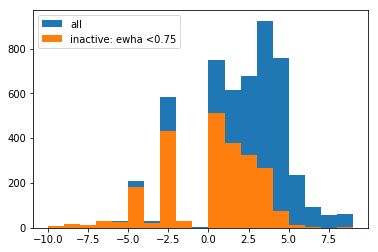

In [108]:
mask = ~np.isnan(movinggroups['ewha'])
mask_inactive = movinggroups['ewha'] < 0.75
plt.hist(movinggroups['spt'][mask],bins=np.arange(-10,10),label='all');
plt.hist(movinggroups['spt'][mask*mask_inactive],bins=np.arange(-10,10),label='inactive: ewha <0.75')
plt.legend();

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


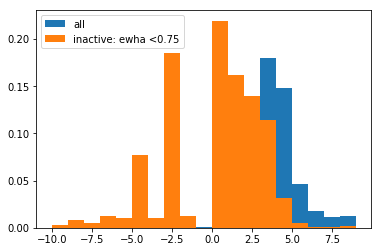

In [109]:
plt.hist(movinggroups['spt'][mask],bins=np.arange(-10,10),label='all',
         normed=True);
plt.hist(movinggroups['spt'][mask*mask_inactive],bins=np.arange(-10,10),label='inactive: ewha <0.75',
         normed=True)
plt.legend();

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


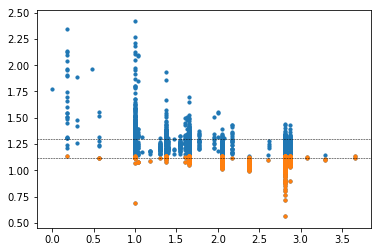

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


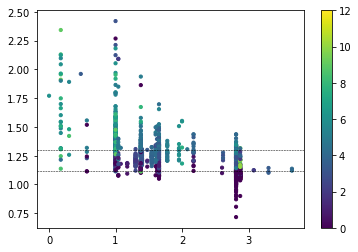

In [110]:
linewidth=0.5
min_halpha = np.min(movinggroups['ewha'][~np.isnan(movinggroups['ewha'])])
plt.scatter(np.log10(movinggroups['age']),np.log10(movinggroups['ewha']-min_halpha),s=10)
plt.scatter(np.log10(movinggroups['age'][mask_inactive]),np.log10(movinggroups['ewha'][mask_inactive]-min_halpha),
            s=10)
plt.axhline(y=np.log10(-min_halpha),color='k',linestyle='--',linewidth=linewidth)
plt.axhline(y=np.log10(20),color='k',linestyle='--',linewidth=linewidth)
#plt.ylim(-10,50)
plt.show()

plt.scatter(np.log10(movinggroups['age']),np.log10(movinggroups['ewha']-min_halpha),c=movinggroups['spt'],s=10,vmin=0)
plt.axhline(y=np.log10(-min_halpha),color='k',linestyle='--',linewidth=linewidth)
plt.axhline(y=np.log10(20),color='k',linestyle='--',linewidth=linewidth)
plt.colorbar()
#plt.ylim(-10,50)
plt.show()

In [111]:
movinggroups.write('Catalogs/mactivity_movinggroups.fits',format='fits',overwrite=True)